In [3]:
import os
import cv2
import shutil
import random
import numpy as nptw
import pandas as pd
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
images_dir = r"images"
train_images_dir = r"train_images"
test_images_dir = r"test_images"

img_size = 250
batch_size = 32

generator = ImageDataGenerator(zoom_range = 0.3,
                               rotation_range = 90,
                               horizontal_flip = True,
                               vertical_flip = True,
                               validation_split = 0.1,)
train_data = generator.flow_from_directory(
                            train_images_dir,
                            target_size = (img_size, img_size),
                            batch_size = batch_size,
                            subset = "training")

validation_data = generator.flow_from_directory(
                            train_images_dir,
                            target_size = (img_size, img_size),
                            batch_size = 32,
                            subset = "validation")

test_data = generator.flow_from_directory(
                            test_images_dir,
                            target_size = (img_size, img_size),
                            batch_size = batch_size,
                            subset = "validation")

Found 7213 images belonging to 7 classes.
Found 799 images belonging to 7 classes.
Found 198 images belonging to 7 classes.


In [3]:
from tensorflow.keras.applications import DenseNet201
from keras import Model

densenet_model = DenseNet201(weights="imagenet", include_top = False, input_shape = (250, 250, 3))
for layer in densenet_model.layers:
    layer.trainable = False
last_layer = densenet_model.get_layer('relu')
last_output = last_layer.output

x = GlobalAveragePooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(7, activation='softmax')(x)
model = Model(densenet_model.input, x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 778s 3s/step - accuracy: 0.5705 - loss: 2.0499 - val_accuracy: 0.6683 - val_loss: 0.9003
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 750s 3s/step - accuracy: 0.6566 - loss: 1.0322 - val_accuracy: 0.6771 - val_loss: 0.8644
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 750s 3s/step - accuracy: 0.6585 - loss: 1.0082 - val_accuracy: 0.6821 - val_loss: 0.8466
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 749s 3s/step - accuracy: 0.6558 - loss: 1.0079 - val_accuracy: 0.6834 - val_loss: 0.8624
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 750s 3s/step - accuracy: 0.6873 - loss: 0.9122 - val_accuracy: 0.6821 - val_loss: 0.8272
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 751s 3s/step - accuracy: 0.6836 - loss: 0.9070 - val_accuracy: 0.6834 - val_loss: 0.8273
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 747s 3s/step - accuracy: 0.6836 - loss: 0.9016 - val_accuracy: 0.6746 - val_loss: 0.8265
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 747s 3s/step - accuracy: 0.6790 - loss: 0.9061 - val_accu

In [5]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

for layer in densenet_model.layers:
    layer.trainable = True

optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [6]:
epochs = 10
history = model.fit(train_data,
                              epochs = epochs, validation_data = validation_data,
                              verbose = 1, 
                              callbacks=[learning_rate_reduction])

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 3091s 13s/step - acc: 0.6778 - loss: 0.9009 - val_acc: 0.7472 - val_loss: 0.7183 - learning_rate: 1.0000e-04
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2958s 13s/step - acc: 0.7291 - loss: 0.7104 - val_acc: 0.7810 - val_loss: 0.6465 - learning_rate: 1.0000e-04
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2957s 13s/step - acc: 0.7741 - loss: 0.6327 - val_acc: 0.7635 - val_loss: 0.7109 - learning_rate: 1.0000e-04
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2956s 13s/step - acc: 0.8022 - loss: 0.5501 - val_acc: 0.8248 - val_loss: 0.5306 - learning_rate: 1.0000e-04
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2951s 13s/step - acc: 0.8231 - loss: 0.4873 - val_acc: 0.7847 - val_loss: 0.6030 - learning_rate: 1.0000e-04
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 2948s 13s/step - acc: 0.8457 - loss: 0.4405 - val_acc: 0.7760 - val_loss: 0.6759 - learning_rate: 1.0000e-04
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - acc: 0.8573 - loss: 0.4117 
Epoch 7: ReduceLROnPlate

In [7]:
model.save("densenet.keras")

In [5]:
from tensorflow.keras.optimizers import Adam

custom_optimizer = Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    decay=0.0,
    amsgrad=False
)

model = tf.keras.models.load_model('densenet.keras', compile=False)

model.compile(
    loss='categorical_crossentropy',
    optimizer=custom_optimizer,
    metrics=['acc']
)

In [5]:
loss, accuracy = model.evaluate(test_data, verbose=2)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

7/7 - 43s - 6s/step - acc: 0.8687 - loss: 0.5942
Test Loss: 0.5942244529724121
Test Accuracy: 0.868686854839325


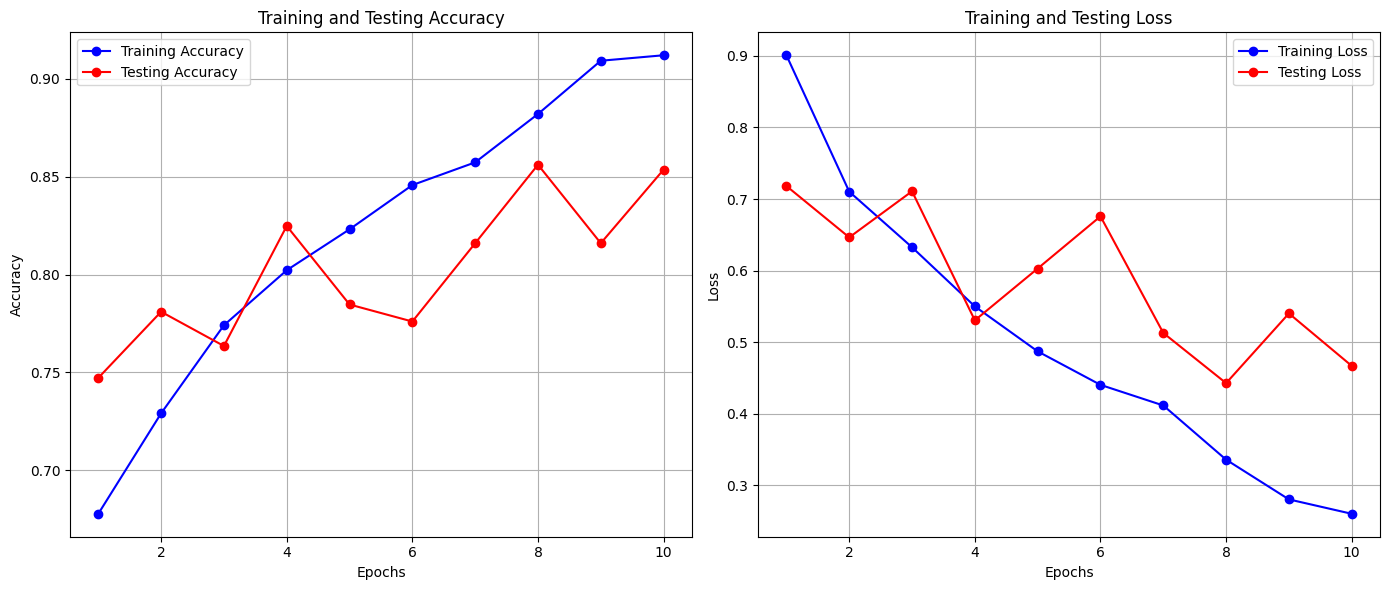

In [7]:
epochs = range(1, 11)
train_acc = [0.6778, 0.7291, 0.7741, 0.8022, 0.8231, 0.8457, 0.8573, 0.8820, 0.9092, 0.9120]
train_loss = [0.9009, 0.7104, 0.6327, 0.5501, 0.4873, 0.4405, 0.4117, 0.3360, 0.2805, 0.2604]
val_acc = [0.7472, 0.7810, 0.7635, 0.8248, 0.7847, 0.7760, 0.8160, 0.8561, 0.8160, 0.8536]
val_loss = [0.7183, 0.6465, 0.7109, 0.5306, 0.6030, 0.6759, 0.5130, 0.4429, 0.5403, 0.4670]

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

7/7 - 29s - 4s/step - acc: 0.8687 - loss: 0.3313


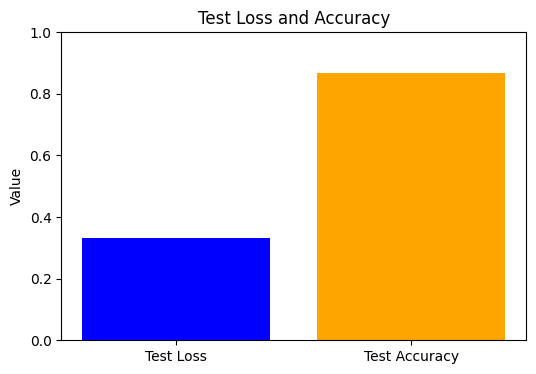

In [6]:
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)

# Store the results
results = {'Test Loss': test_loss, 'Test Accuracy': test_accuracy}

metrics = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'orange'])
plt.ylabel('Value')
plt.title('Test Loss and Accuracy')
plt.ylim(0, 1)  # Adjust based on your metrics
plt.show()